![Screenshot 2025-12-23 192647.png](<attachment:Screenshot 2025-12-23 192647.png>)
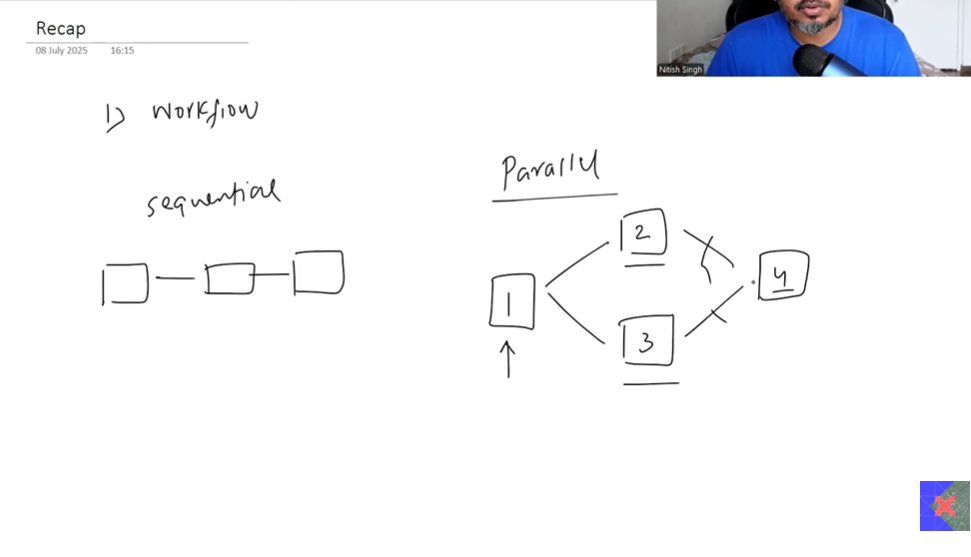

![Screenshot 2025-12-23 192945.png](<attachment:Screenshot 2025-12-23 192945.png>)
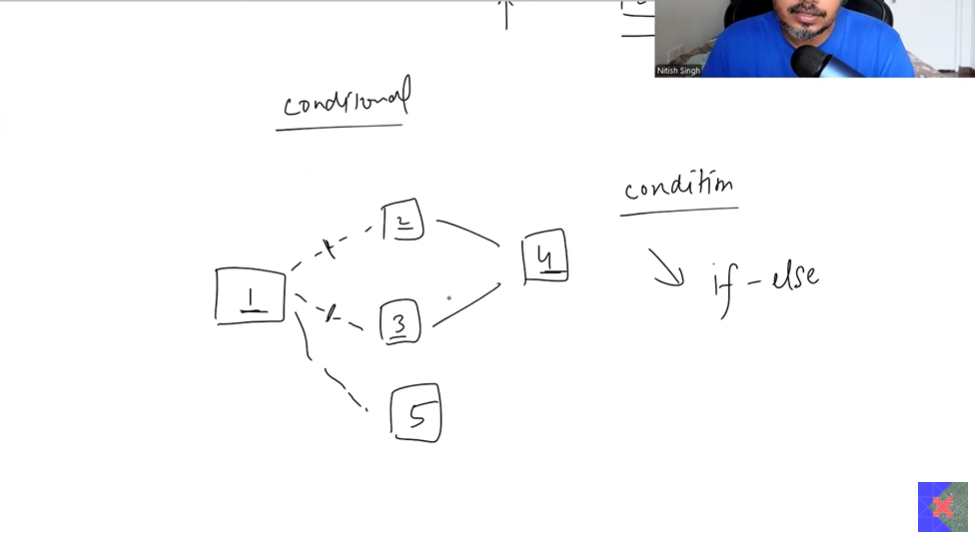

![Screenshot 2025-12-23 195111.png](<attachment:Screenshot 2025-12-23 195111.png>)
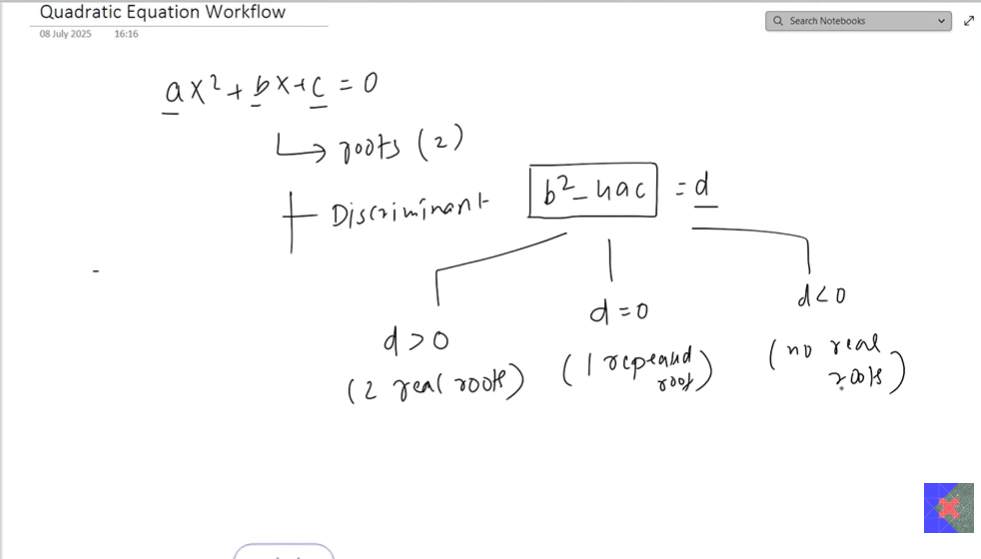

![Screenshot 2025-12-23 195245.png](<attachment:Screenshot 2025-12-23 195245.png>)
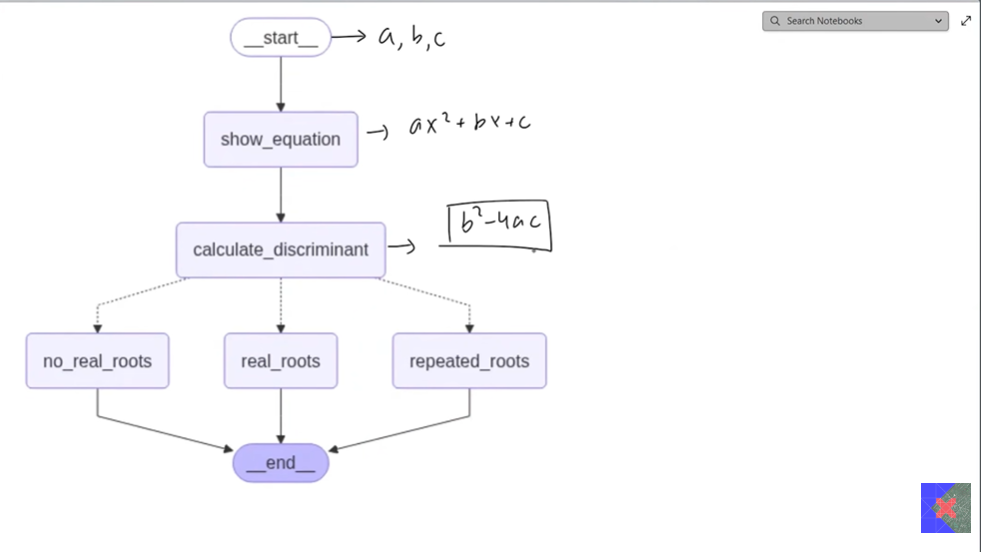

In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [3]:
class QuadState(TypedDict):

    a: int
    b: int
    c: int

    equation: str
    discriminant: float
    result: str

In [4]:
def show_equation(state: QuadState):

    equation = f'{state["a"]}x2{state["b"]}x{state["c"]}'

    return {'equation':equation}

def calculate_discriminant(state: QuadState):

    discriminant = state["b"]**2 - (4*state["a"]*state["c"])

    return {'discriminant': discriminant}

def real_roots(state: QuadState):

    root1 = (-state["b"] + state["discriminant"]**0.5)/(2*state["a"])
    root2 = (-state["b"] - state["discriminant"]**0.5)/(2*state["a"])

    result = f'The roots are {root1} and {root2}'

    return {'result': result}

def repeated_roots(state: QuadState):

    root = (-state["b"])/(2*state["a"])

    result = f'Only repeating root is {root}'

    return {'result': result}
def no_real_roots(state: QuadState):

    result = f'No real roots'

    return {'result': result}

def check_condition(state: QuadState) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:

    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"

In [5]:
graph = StateGraph(QuadState)

graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_roots', repeated_roots)
graph.add_node('no_real_roots', no_real_roots)


graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')

graph.add_conditional_edges('calculate_discriminant', check_condition)
graph.add_edge('real_roots', END)
graph.add_edge('repeated_roots', END)
graph.add_edge('no_real_roots', END)

workflow = graph.compile()

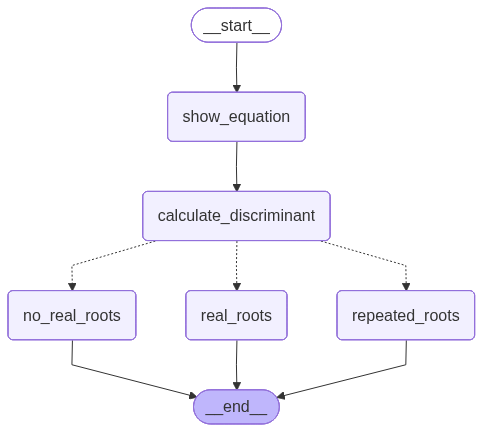

In [6]:
workflow

In [7]:
initial_state = {
    'a': 2, 
    'b': 4,
    'c': 2
}

workflow.invoke(initial_state)

{'a': 2,
 'b': 4,
 'c': 2,
 'equation': '2x24x2',
 'discriminant': 0,
 'result': 'Only repeating root is -1.0'}